In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Análisis del gasto en educación

In [2]:
# Gasto Educación
dfA = pd.read_csv('gasto_educacion2.csv', encoding='utf-8', sep=';')
dfA_limpio = dfA.dropna().copy() # para que realice todo sobre una copia y no el original
dfA_limpio['gasto_pib'] = dfA_limpio['gasto_pib'].str.replace('%', '', regex=False).str.replace(',', '.') # regex = Falso para que no use expresiones regulares en el replace
dfA_limpio['gasto_pib'] = dfA_limpio['gasto_pib'].astype(float)
dfA_limpio['anyo'] = dfA_limpio['anyo'].astype(int)
dfA_limpio = dfA_limpio.drop_duplicates()
dfA_limpio = dfA_limpio.sort_values(by='anyo', ascending=False)
print(dfA_limpio)

                      pais  anyo  gasto_pib
139              Filipinas  2025       3.97
87                 Jamaica  2024       5.51
100            Santa Lucía  2024       3.85
126                Namibia  2024       9.08
53                Dominica  2024       5.39
...                    ...   ...        ...
8267       Costa de Marfil  1970       5.87
8257             Argentina  1970       1.46
7742                  Togo  1970       1.50
7875                Guyana  1970       4.33
7359  República Dominicana  1970       2.64

[5425 rows x 3 columns]


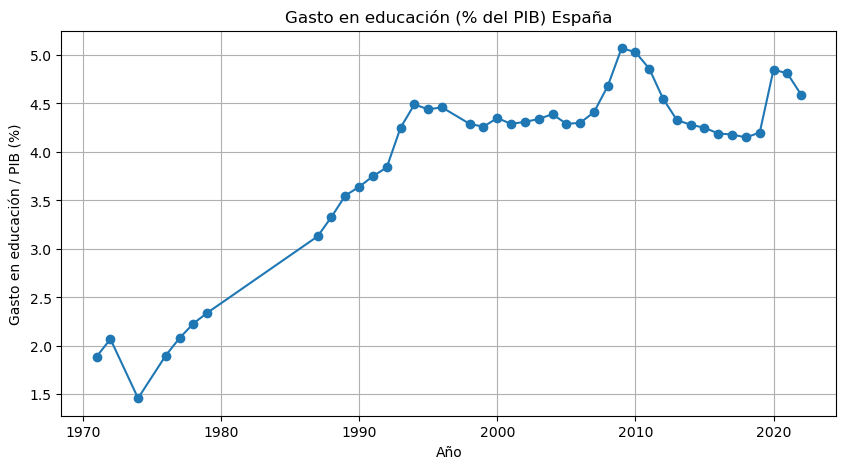

In [3]:
# Evolución del gasto de un país
pais = 'España'
ej = dfA_limpio[dfA_limpio['pais'] == pais]

plt.figure(figsize=(10,5))
plt.plot(ej['anyo'], ej['gasto_pib'], marker='o')
plt.title("Gasto en educación (% del PIB)" + ' ' + pais)
plt.xlabel("Año")
plt.ylabel("Gasto en educación / PIB (%)")
plt.grid(True)
plt.show()


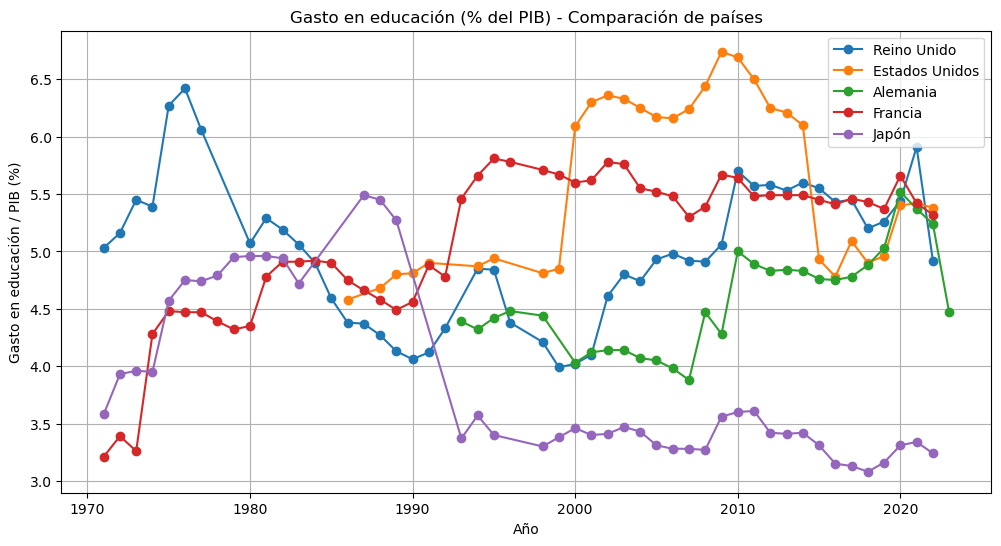

In [4]:
#Comparar varios países
paises_ejemplo = ['Reino Unido', 'Estados Unidos', 'Alemania', 'Francia', 'Japón']

plt.figure(figsize=(12,6))
for pais in paises_ejemplo:
    subset = dfA_limpio[dfA_limpio['pais'] == pais]
    plt.plot(subset['anyo'], subset['gasto_pib'], marker='o', label=pais)

plt.title("Gasto en educación (% del PIB) - Comparación de países")
plt.xlabel("Año")
plt.ylabel("Gasto en educación / PIB (%)")
plt.legend()
plt.grid(True)
plt.show()

pais
Estados Federados de Micronesia    15.617500
Islas Marshall                     15.122222
Kiribati                           11.746111
Tuvalu                             11.186667
Cuba                                9.399286
                                     ...    
Haití                               1.254375
Sudán del Sur                       1.232500
Guinea Ecuatorial                   1.100000
Nigeria                             0.802857
Somalia                             0.477273
Name: gasto_pib, Length: 193, dtype: float64


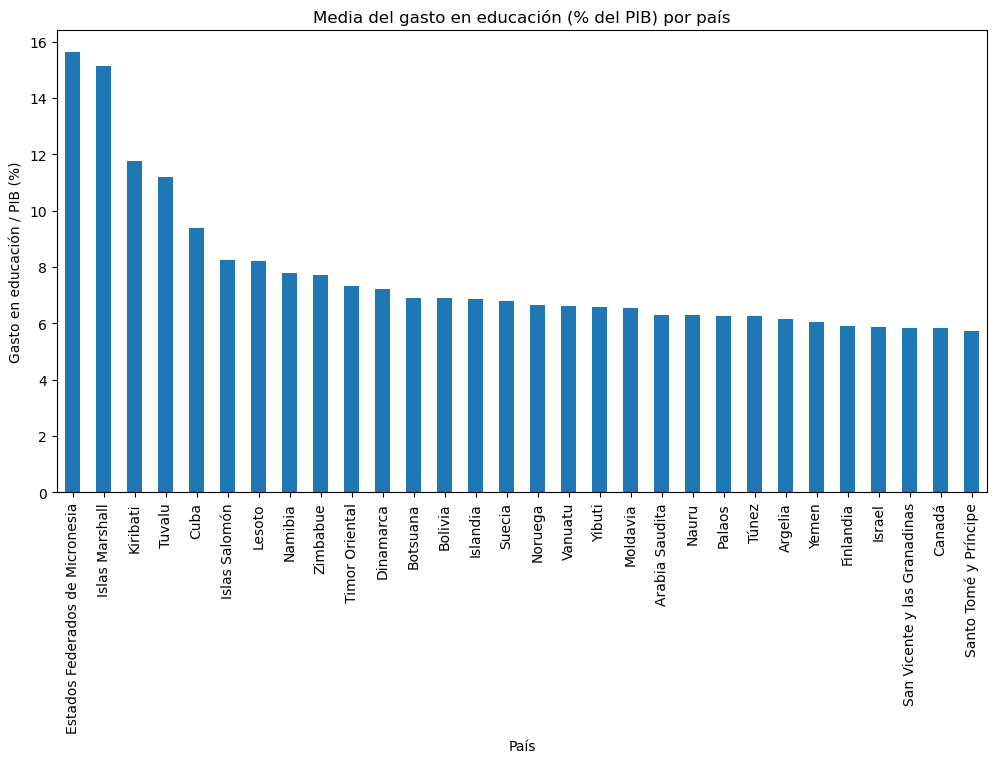

In [5]:
#Media de gasto por país
media_pais = dfA_limpio.groupby('pais')['gasto_pib'].mean().sort_values(ascending=False)
print(media_pais)

#Gráfico de barras de la media
plt.figure(figsize=(12,6))
media_pais.head(30).plot(kind='bar')
plt.title("Media del gasto en educación (% del PIB) por país")
plt.ylabel("Gasto en educación / PIB (%)")
plt.xlabel("País")
plt.xticks(rotation=90)
plt.show()

pais
Suecia            6.789412
Canadá            5.827292
Estados Unidos    5.591563
Francia           5.070784
Reino Unido       5.000417
Suiza             4.643529
Alemania          4.565517
Italia            4.239750
Rusia             3.894348
Japón             3.842727
Name: gasto_pib, dtype: float64


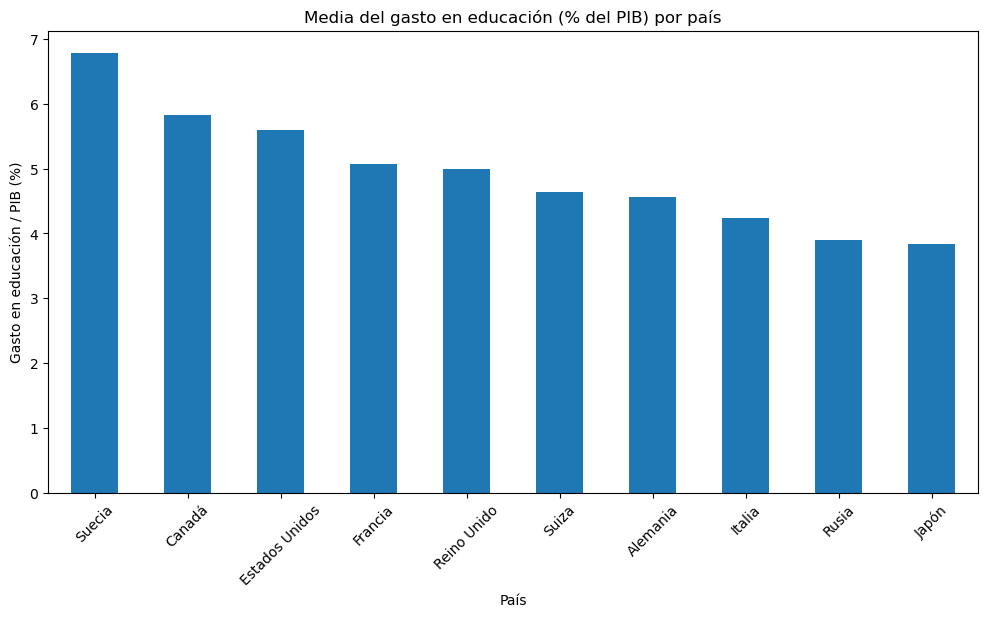

In [6]:
#Media de gasto por país
"""
Esta selección de países corresponde al top 10 de los países con mayor número de premios Nobel en el dataset de premios.
"""
paises_ejemplo = ['Reino Unido', 'Estados Unidos', 'Alemania', 'Francia', 'Japón', 'Suecia', 'Rusia', 'Italia', 'Canadá', 'Suiza']
dfA_filtrado = dfA_limpio[dfA_limpio['pais'].isin(paises_ejemplo)]
media_pais = dfA_filtrado.groupby('pais')['gasto_pib'].mean().sort_values(ascending=False)
print(media_pais)
#Gráfico de barras de la media
plt.figure(figsize=(12,6))
media_pais.head(30).plot(kind='bar')
plt.title("Media del gasto en educación (% del PIB) por país")
plt.ylabel("Gasto en educación / PIB (%)")
plt.xlabel("País")
plt.xticks(rotation=45)
plt.show()

# Análisis de los laureados

In [7]:
#Cargar el CSV 
dfL = pd.read_csv("laureados.csv", sep=";")

#Primer vistazo
print(dfL.head())        # primeras filas
print(dfL.info())        # tipos de datos y nulos
print(dfL.describe())    # estadísticos básicos

       pais            nombre               categoria   anyo
0  Alemania     Joachim Frank                 Química   2017
1  Alemania      Rainer Weiss                  Física   2017
2  Alemania       Stefan Hell                 Química   2014
3  Alemania  Thomas C. Südhof   Fisiología o Medicina   2013
4  Alemania      Herta Müller              Literatura   2009
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pais       1001 non-null   object
 1   nombre     1001 non-null   object
 2   categoria  1001 non-null   object
 3   anyo       1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
None
                  pais          nombre               categoria   anyo
count             1001            1001                    1001   1000
unique              59             832                      10    121
top     Estados Unidos  Charles K. Kao

In [8]:
#Eliminar espacios sobrantes
dfL['pais'] = dfL['pais'].str.strip()
dfL['categoria'] = dfL['categoria'].str.strip()
dfL['nombre'] = dfL['nombre'].str.strip()

In [9]:
#Convertir año a numérico
dfL['anyo'] = pd.to_numeric(dfL['anyo'], errors='coerce')

In [10]:
#Normalizar categoría
dfL['categoria'] = dfL['categoria'].replace({'Medicina': 'Fisiología o Medicina'})
dfL['categoria'] = dfL['categoria'].replace({'Medicine': 'Fisiología o Medicina'})
dfL['categoria'] = dfL['categoria'].replace({'Economic Sciences': 'Economía'})
dfL['categoria'] = dfL['categoria'].replace({'Química 2018': 'Química'})

In [11]:
#Premio nobel por país
nobel_por_pais = dfL.groupby('pais').size().sort_values(ascending=False)
print(nobel_por_pais.head(10))

pais
Estados Unidos             362
Reino Unido                119
Alemania                   102
Francia                     58
Japón                       27
Suecia                      27
Canadá                      24
Suiza                       24
Rusia y Unión Soviética     22
Italia                      19
dtype: int64


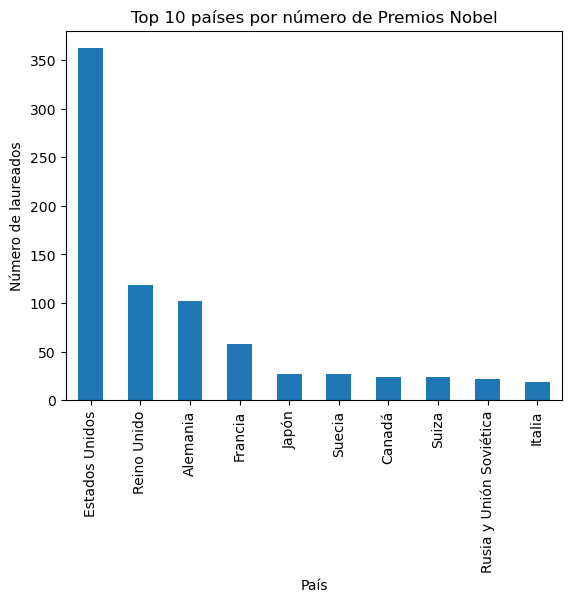

In [12]:
#Países con más premios Nobel
import matplotlib.pyplot as plt

plt.figure()
nobel_por_pais.head(10).plot(kind='bar')
plt.title("Top 10 países por número de Premios Nobel")
plt.xlabel("País")
plt.ylabel("Número de laureados")
plt.xticks()
plt.show()

categoria
Economía                  63
Fisiología o Medicina    107
Física                   101
Literatura                13
Química                   78
Name: Estados Unidos, dtype: int64


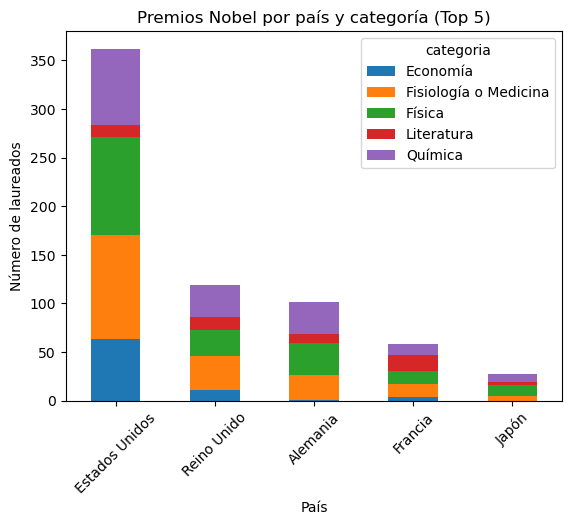

In [13]:
#Relación de país por categoría
tabla_pais_categoria = pd.crosstab(dfL['pais'], dfL['categoria'])
print(tabla_pais_categoria.loc['Estados Unidos'])

tabla_pais_categoria.loc[nobel_por_pais.head(5).index].plot(kind='bar', stacked=True)

plt.title("Premios Nobel por país y categoría (Top 5)")
plt.xlabel("País")
plt.ylabel("Número de laureados")
plt.xticks(rotation=45)
plt.show()


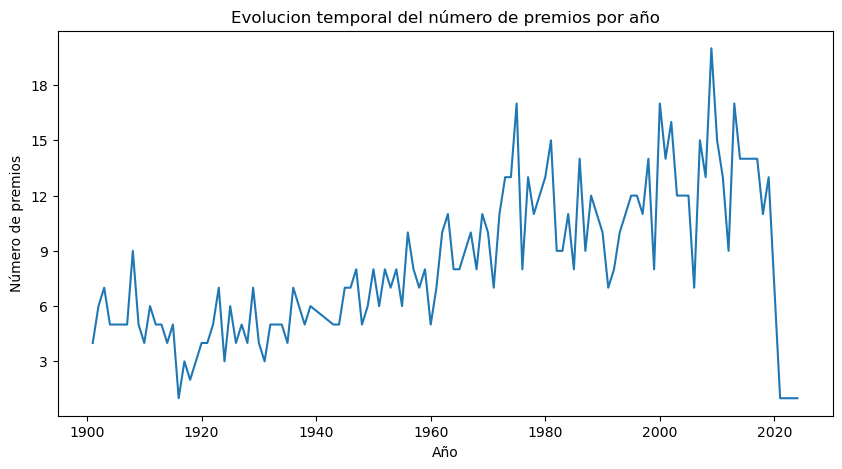

In [14]:
# Evolucion temporal
premios_por_anyo = dfL.groupby('anyo').size()
plt.figure(figsize=(10,5))
plt.plot(premios_por_anyo.index, premios_por_anyo.values)
plt.title("Evolucion temporal del número de premios por año")
plt.xlabel("Año")
plt.ylabel("Número de premios")

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
 
plt.show()


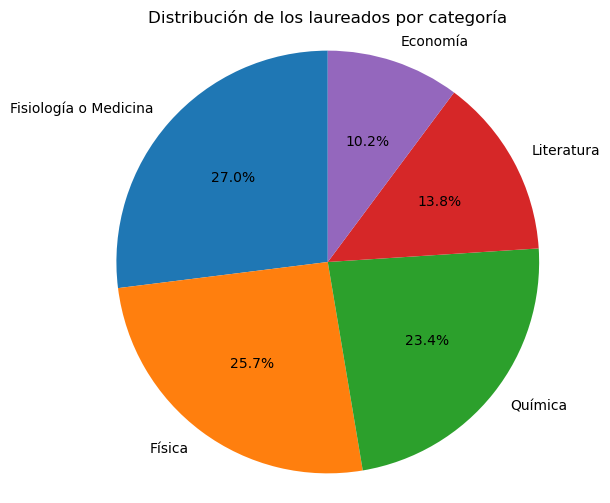

In [15]:
# Conteo de laureados por categoría
categorias = dfL['categoria'].value_counts()

# Diagrama de sectores
plt.figure(figsize=(6, 6))
plt.pie(
    categorias.values,
    labels=categorias.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Distribución de los laureados por categoría")
plt.axis('equal')  # Para que el círculo sea perfecto

plt.show()

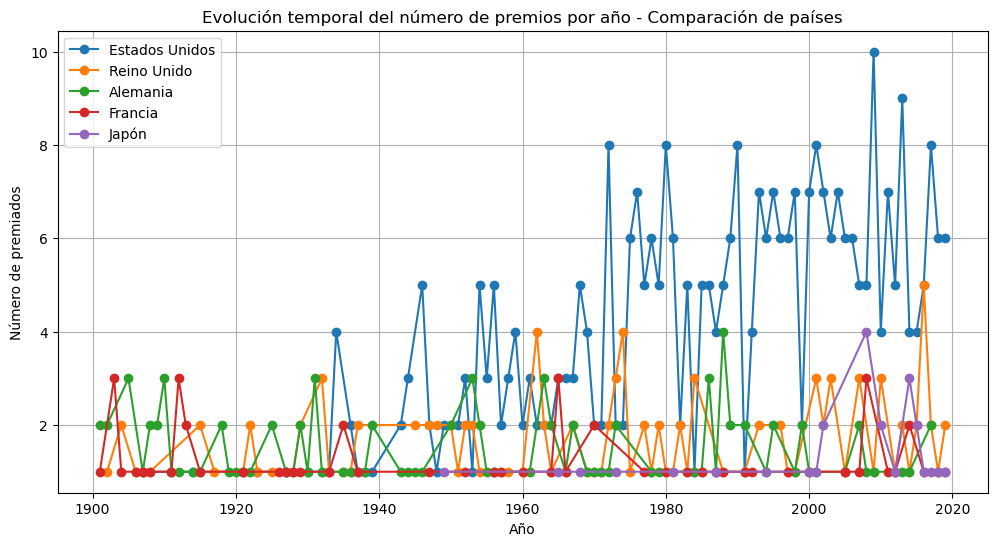

In [16]:
# Evolucion temporal por país
paises = ['Estados Unidos', 'Reino Unido', 'Alemania', 'Francia', 'Japón']
premios_por_anyo = dfL.groupby(['anyo', 'pais']).size().reset_index(name='n_premios')

plt.figure(figsize=(12,6))
for pais in paises:
    subset = premios_por_anyo[premios_por_anyo['pais'] == pais]
    plt.plot(subset['anyo'], subset['n_premios'], marker='o', label=pais)

plt.title("Evolución temporal del número de premios por año - Comparación de países")
plt.xlabel("Año")
plt.ylabel("Número de premiados")
plt.legend()
plt.grid(True)
plt.show()

# Análisis del gasto en investigación

In [17]:
#Cargar el CSV 
dfI = pd.read_csv("research_spending.csv", sep=";")

#Primer vistazo
print(dfI.head())        # primeras filas
print(dfI.info())        # tipos de datos y nulos
print(dfI.describe())    # estadísticos básicos

        pais codigo  anyo  investigacion_pib
0  Argentina    ARG  1996            0.41749
1  Argentina    ARG  1997            0.41959
2  Argentina    ARG  1998            0.41131
3  Argentina    ARG  1999            0.45337
4  Argentina    ARG  2000            0.43884
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pais               1316 non-null   object 
 1   codigo             1316 non-null   object 
 2   anyo               1316 non-null   int64  
 3   investigacion_pib  1316 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.3+ KB
None
              anyo  investigacion_pib
count  1316.000000        1316.000000
mean   2009.518237           1.386651
std       7.660107           1.061422
min    1996.000000           0.015900
25%    2003.000000           0.543505
50%    2010.000000           1.103875
75

In [18]:
#Convertir columnas a tipos adecuados
dfI['anyo'] = dfI['anyo'].astype(int)
dfI['investigacion_pib'] = dfI['investigacion_pib'].astype(float)

In [19]:
#Estadísticas por país
pais_stats = dfI.groupby('pais')['investigacion_pib'].describe()
print(pais_stats)

                         count      mean       std      min       25%  \
pais                                                                    
Alemania                  27.0  2.685622  0.324695  2.14461  2.435705   
Argentina                 27.0  0.498009  0.077558  0.38886  0.422675   
Australia                 14.0  1.941461  0.285587  1.51351  1.766330   
Austria                   27.0  2.551012  0.544748  1.58077  2.116050   
Azerbaiyán                28.0  0.243672  0.073889  0.15130  0.196268   
Bielorrusia               28.0  0.650120  0.129229  0.45981  0.578155   
Bosnia y Herzegovina      19.0  0.145891  0.103408  0.01590  0.023135   
Bulgaria                  27.0  0.594413  0.161166  0.41826  0.465105   
Bélgica                   27.0  2.269293  0.538608  1.74299  1.845590   
Canadá                    28.0  1.811035  0.121363  1.60682  1.711372   
Chile                     15.0  0.358137  0.021188  0.31143  0.347655   
Chipre                    25.0  0.454930  0.177883 

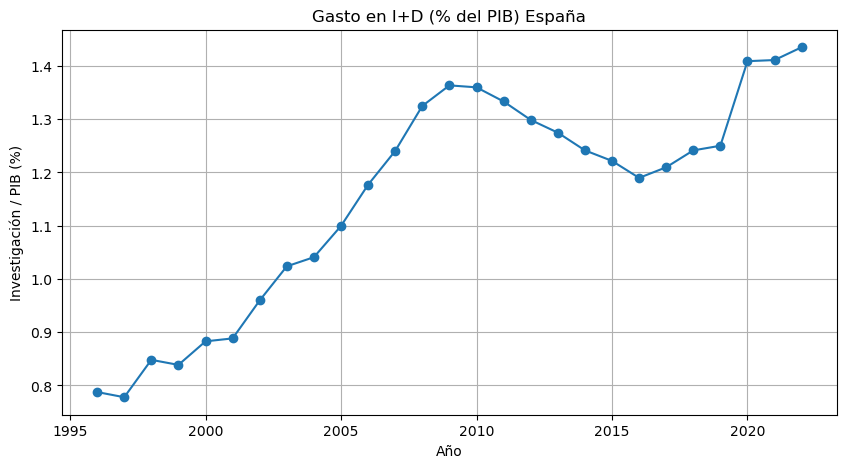

In [20]:
#Evolución temporal de un país
pais = 'España'
ej = dfI[dfI['pais'] == pais]

plt.figure(figsize=(10,5))
plt.plot(ej['anyo'], ej['investigacion_pib'], marker='o')
plt.title("Gasto en I+D (% del PIB)" + ' ' + pais)
plt.xlabel("Año")
plt.ylabel("Investigación / PIB (%)")
plt.grid(True)
plt.show()

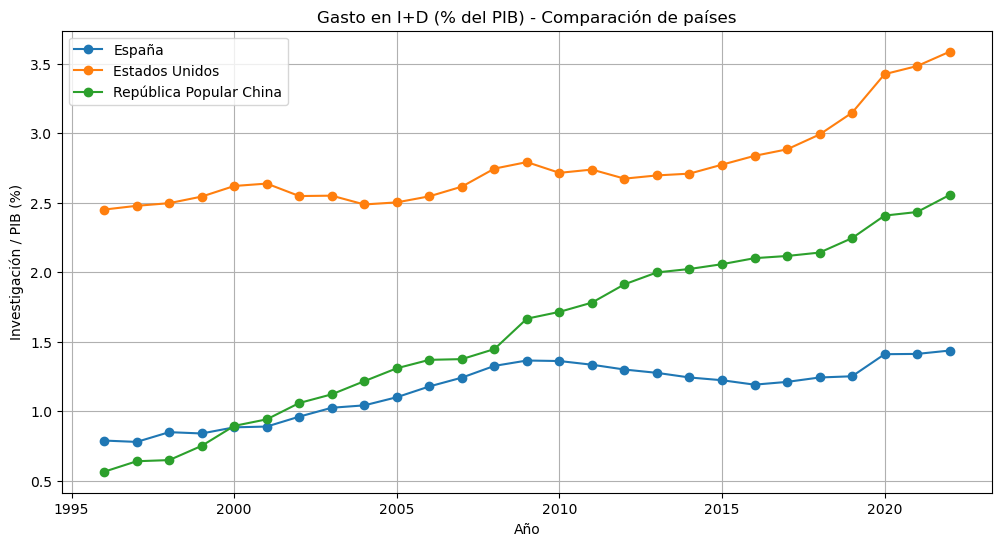

In [21]:
#Comparar varios países
paises_ejemplo = ['España', 'Estados Unidos', 'República Popular China']

plt.figure(figsize=(12,6))
for pais in paises_ejemplo:
    subset = dfI[dfI['pais'] == pais]
    plt.plot(subset['anyo'], subset['investigacion_pib'], marker='o', label=pais)

plt.title("Gasto en I+D (% del PIB) - Comparación de países")
plt.xlabel("Año")
plt.ylabel("Investigación / PIB (%)")
plt.legend()
plt.grid(True)
plt.show()

pais
Israel                     4.180170
Suecia                     3.356032
Corea del Sur              3.306520
Finlandia                  3.124506
Japón                      3.108463
Suiza                      2.826068
Estados Unidos             2.765287
Alemania                   2.685622
Dinamarca                  2.635049
Austria                    2.551012
Islandia                   2.376660
Bélgica                    2.269293
Francia                    2.165397
Australia                  1.941461
Países Bajos               1.929761
Reino Unido                1.889436
Canadá                     1.811035
Eslovenia                  1.786531
Noruega                    1.727510
República Popular China    1.572799
República Checa            1.458684
Luxemburgo                 1.354290
Irlanda                    1.254922
Nueva Zelanda              1.202771
Italia                     1.199792
España                     1.152980
Portugal                   1.128705
Hungría                

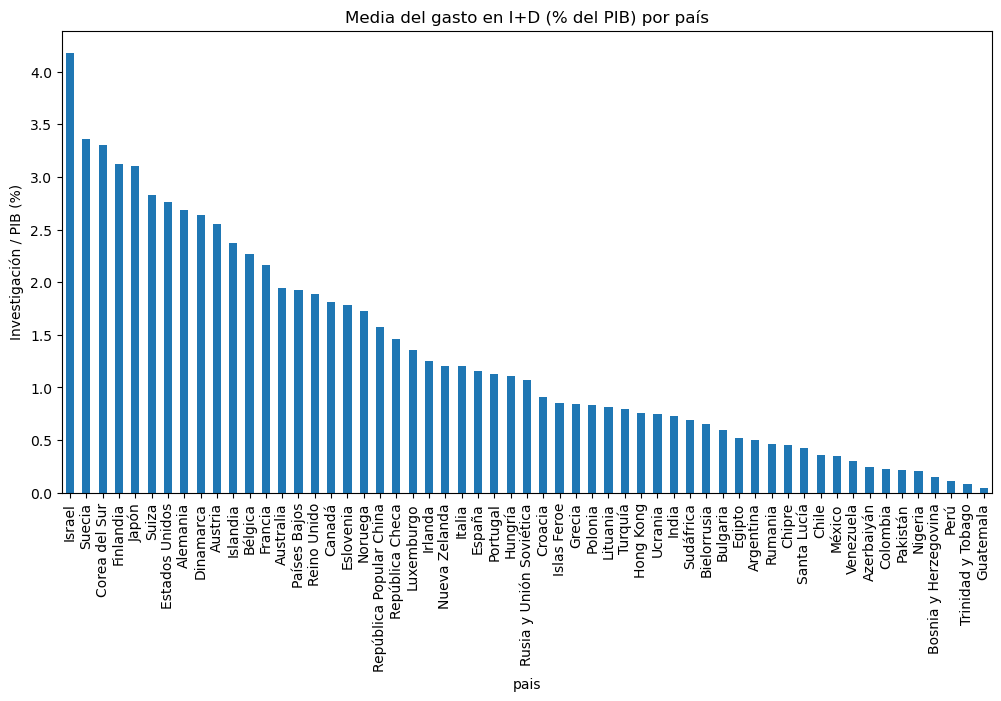

In [22]:
#Media de gasto por país
media_pais = dfI.groupby('pais')['investigacion_pib'].mean().sort_values(ascending=False)
print(media_pais)

#Gráfico de barras de la media
plt.figure(figsize=(12,6))
media_pais.plot(kind='bar')
plt.title("Media del gasto en I+D (% del PIB) por país")
plt.ylabel("Investigación / PIB (%)")
plt.xticks(rotation=90)
plt.show()

pais
Suecia                     3.356032
Japón                      3.108463
Suiza                      2.826068
Estados Unidos             2.765287
Alemania                   2.685622
Francia                    2.165397
Reino Unido                1.889436
Canadá                     1.811035
Italia                     1.199792
Rusia y Unión Soviética    1.074436
Name: investigacion_pib, dtype: float64


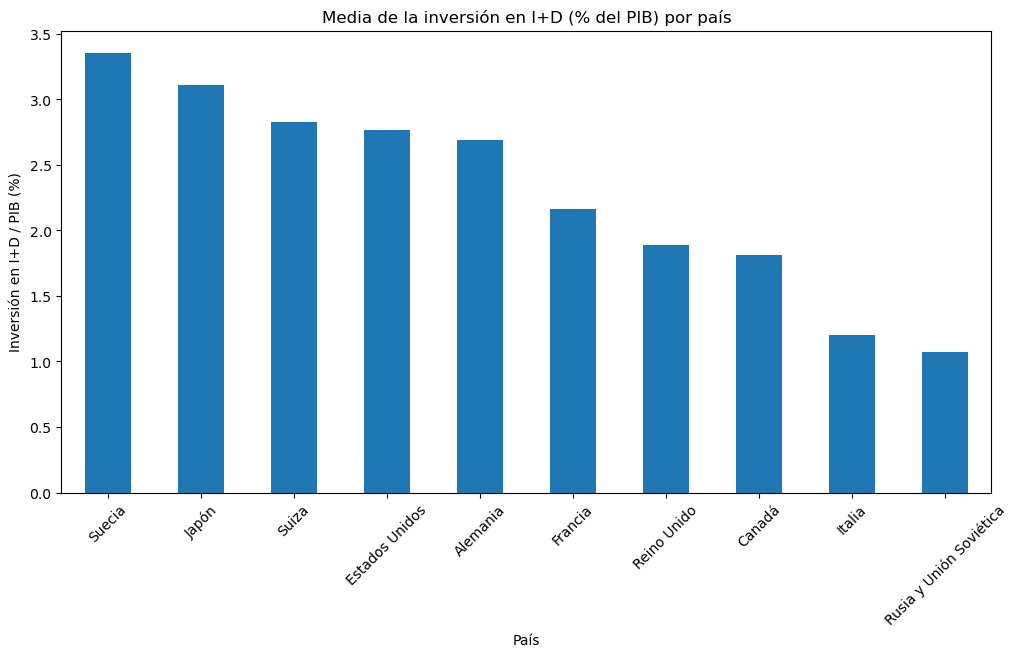

In [23]:
#Media de inversión en investigación por país
"""
Esta selección de países corresponde al top 10 de los países con mayor número de premios Nobel en el dataset de premios.
"""
paises_ejemplo = ['Reino Unido', 'Estados Unidos', 'Alemania', 'Francia', 'Japón', 'Suecia', 'Rusia y Unión Soviética', 'Italia', 'Canadá', 'Suiza']
dfI_filtrado = dfI[dfI['pais'].isin(paises_ejemplo)]
media_pais = dfI_filtrado.groupby('pais')['investigacion_pib'].mean().sort_values(ascending=False)
print(media_pais)
#Gráfico de barras de la media
plt.figure(figsize=(12,6))
media_pais.head(30).plot(kind='bar')
plt.title("Media de la inversión en I+D (% del PIB) por país")
plt.ylabel("Inversión en I+D / PIB (%)")
plt.xlabel("País")
plt.xticks(rotation=45)
plt.show()

# Análisis correlacional: modelo 1
### Análisis correlacional año a año.

In [24]:
# dfA_limpio --> Gasto en educación
# premios_por_anyo --> Número de laureados por año y por país
# dfI --> Gasto en Inversión

dfC = (premios_por_anyo.merge(dfI[['pais', 'anyo', 'investigacion_pib']], on=['pais', 'anyo'], how='inner')
           .merge(dfA_limpio[['pais', 'anyo', 'gasto_pib']], on=['pais', 'anyo'], how='inner'))
dfC['anyo'] = dfC['anyo'].astype(int)
# Filtramos solo años y países con al menos un premio Nobel
dfC = dfC[dfC['n_premios'] > 0]
print(dfC.head())        # primeras filas
print(dfC.info())        # tipos de datos y nulos
print(dfC.describe())    # estadísticos básicos

   anyo         pais  n_premios  investigacion_pib  gasto_pib
0  1996    Australia          1            1.66218       5.23
1  1996      Polonia          1            0.63937       6.23
2  1996  Reino Unido          2            1.57540       4.38
3  1996        Suiza          1            2.37649       4.92
4  1998     Alemania          1            2.21613       4.44
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   anyo               121 non-null    int64  
 1   pais               121 non-null    object 
 2   n_premios          121 non-null    int64  
 3   investigacion_pib  121 non-null    float64
 4   gasto_pib          121 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.9+ KB
None
              anyo   n_premios  investigacion_pib   gasto_pib
count   121.000000  121.000000         121.000000  121.0000

                   n_premios  investigacion_pib  gasto_pib
n_premios           1.000000           0.219874   0.309348
investigacion_pib   0.219874           1.000000   0.076563
gasto_pib           0.309348           0.076563   1.000000


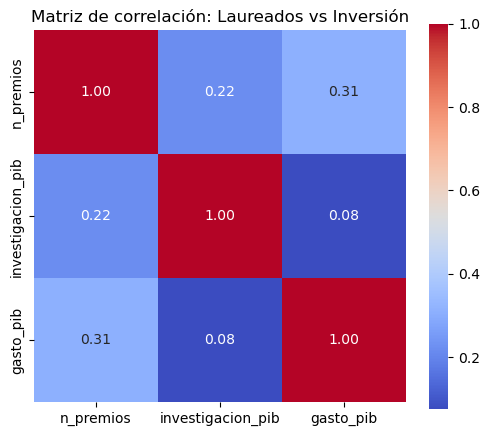

In [25]:
#Matriz de correlación

corr = dfC[['n_premios', 'investigacion_pib', 'gasto_pib']].corr()
print(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación: Laureados vs Inversión")
plt.show()

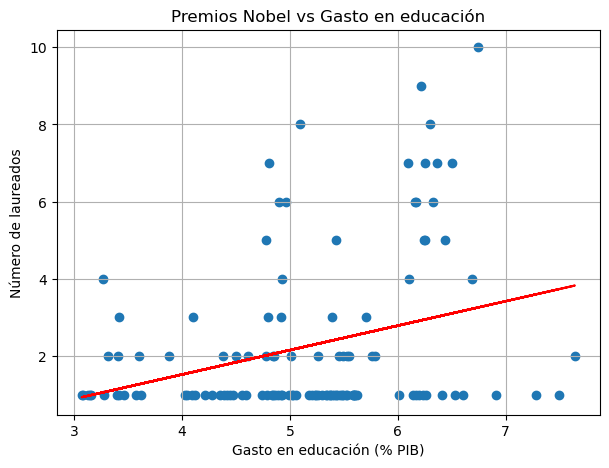

In [26]:
# Premios vs. educacion


x = dfC['gasto_pib']
y = dfC['n_premios']

plt.figure(figsize=(7,5))
plt.scatter(x, y)

# Línea roja de tendencia
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel("Gasto en educación (% PIB)")
plt.ylabel("Número de laureados")
plt.title("Premios Nobel vs Gasto en educación")
plt.grid(True)
plt.show()


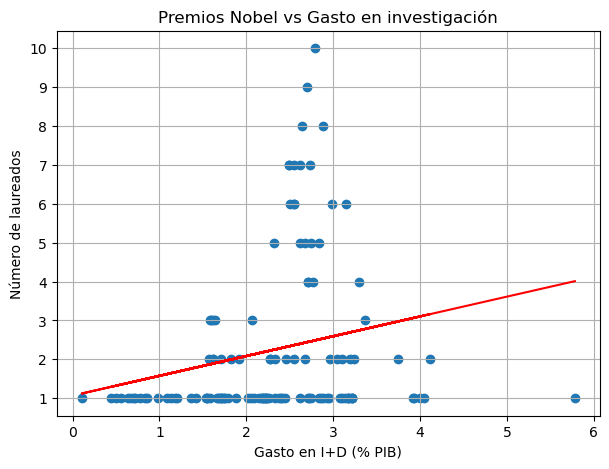

In [27]:
# Premios vs. investigación

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

x = dfC['investigacion_pib']
y = dfC['n_premios']

plt.figure(figsize=(7,5))
plt.scatter(x, y)

# Línea roja de tendencia
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel("Gasto en I+D (% PIB)")
plt.ylabel("Número de laureados")
plt.title("Premios Nobel vs Gasto en investigación")
plt.grid(True)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


# Análisis correlacional: modelo 2
### Análisis agrupado por países
Número de premios obtenidos por países, comparado con la media del gasto histórico en educación y la media del gasto histórico en I+D+i

In [28]:
# Agrupación por número de premios

df_correl = dfC.groupby('pais').agg({
    'n_premios': 'sum',           # suma total de premios
    'investigacion_pib': 'mean',  # promedio de gasto en investigación
    'gasto_pib': 'mean'           # promedio de gasto en educación
}).reset_index()

df_correl.head()


print(df_correl.head())
print(df_correl.info())
print(df_correl.describe())

          pais  n_premios  investigacion_pib  gasto_pib
0     Alemania         12           2.605145      4.372
1    Australia          2           1.948315      5.620
2      Austria          5           2.374252      5.586
3  Bielorrusia          2           0.611045      5.495
4      Bélgica          1           2.330730      6.600
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pais               27 non-null     object 
 1   n_premios          27 non-null     int64  
 2   investigacion_pib  27 non-null     float64
 3   gasto_pib          27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 996.0+ bytes
None
        n_premios  investigacion_pib  gasto_pib
count   27.000000          27.000000  27.000000
mean    10.000000           1.763520   5.173327
std     25.893272           1.006624   1.125403
min      1

                   n_premios  investigacion_pib  gasto_pib
n_premios           1.000000           0.279788   0.076232
investigacion_pib   0.279788           1.000000   0.341702
gasto_pib           0.076232           0.341702   1.000000


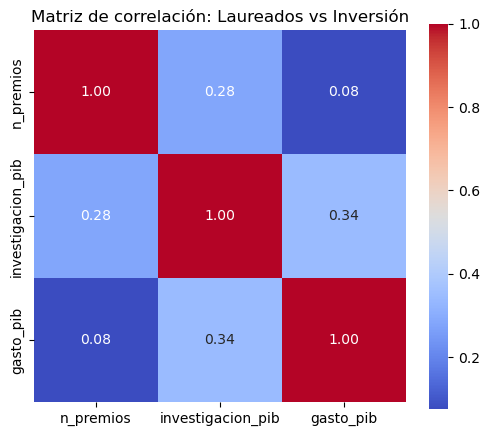

In [29]:
#Matriz de correlación

corr = df_correl[['n_premios', 'investigacion_pib', 'gasto_pib']].corr()
print(corr)


plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación: Laureados vs Inversión")
plt.show()


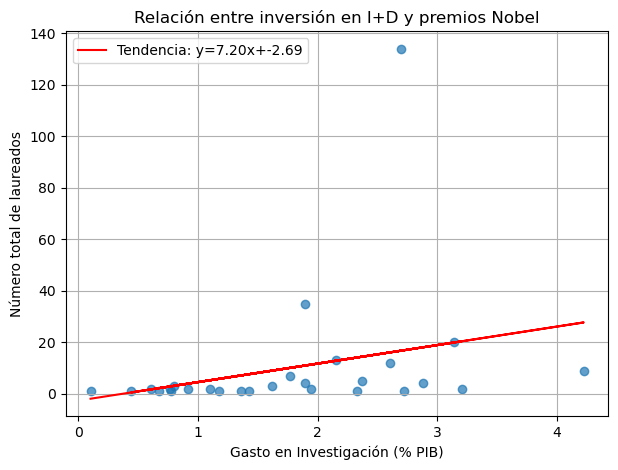

In [30]:
#premios vs Investigación
x = df_correl['investigacion_pib']
y = df_correl['n_premios']

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.7)

# Línea roja de tendencia
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Tendencia: y={m:.2f}x+{b:.2f}')

plt.xlabel("Gasto en Investigación (% PIB)")
plt.ylabel("Número total de laureados")
plt.title("Relación entre inversión en I+D y premios Nobel")
plt.legend()
plt.grid(True)
plt.show()

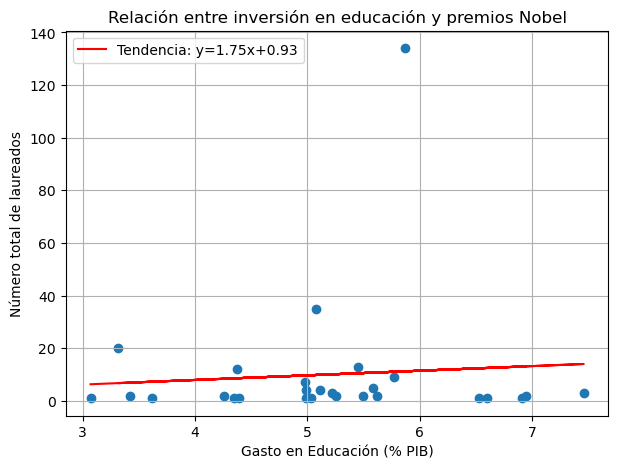

In [31]:
#premios vs gasto en educación
x = df_correl['gasto_pib']
y = df_correl['n_premios']

plt.figure(figsize=(7,5))
plt.scatter(x, y)

# Línea roja de tendencia
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Tendencia: y={m:.2f}x+{b:.2f}')

plt.xlabel("Gasto en Educación (% PIB)")
plt.ylabel("Número total de laureados")
plt.title("Relación entre inversión en educación y premios Nobel")
plt.legend()
plt.grid(True)
plt.show()

# Análisis correlacional: modelo 3
### Análisis correlacional por países excluyendo las categorías de Literatura y Economía

Matriz de correlación (solo ciencias):
                    n_premios  investigacion_pib  gasto_pib
n_premios           1.000000           0.322273   0.167432
investigacion_pib   0.322273           1.000000   0.557309
gasto_pib           0.167432           0.557309   1.000000


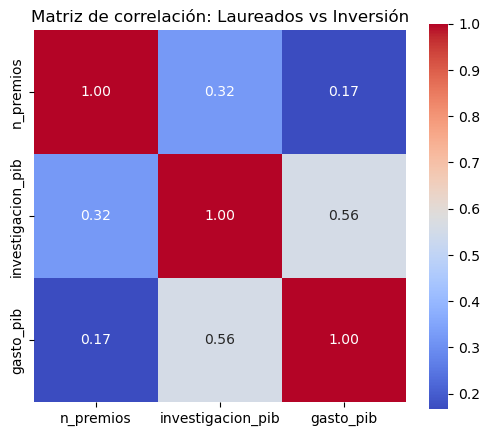

In [32]:
# Filtrar solo categorías de ciencias
ciencias = ['Física', 'Química', 'Fisiología o Medicina']
dfL_ciencias = dfL[dfL['categoria'].isin(ciencias)].copy()

# Número total de laureados por país (solo ciencias)
premios_por_pais = dfL_ciencias.groupby('pais').size().reset_index(name='n_premios')

# Merge con medias de inversión y educación
dfC_ciencias = (premios_por_pais
                .merge(dfI.groupby('pais')['investigacion_pib'].mean().reset_index(), on='pais', how='left')
                .merge(dfA_limpio.groupby('pais')['gasto_pib'].mean().reset_index(), on='pais', how='left'))

# Matriz de correlación
corr = dfC_ciencias[['n_premios', 'investigacion_pib', 'gasto_pib']].corr()
print("Matriz de correlación (solo ciencias):\n", corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación: Laureados vs Inversión")
plt.show()

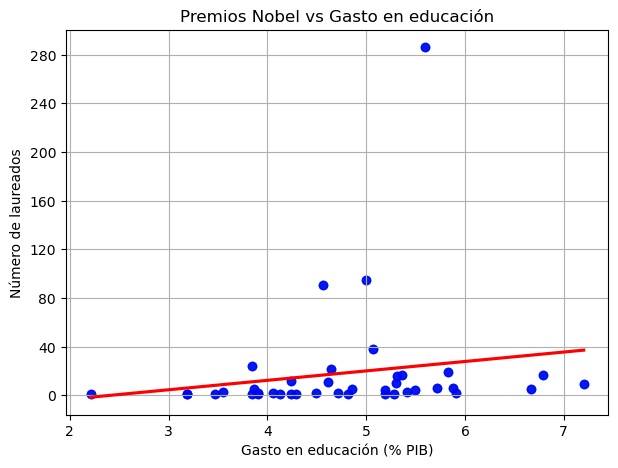

In [33]:
# Premios vs. educacion


x = dfC_ciencias['gasto_pib']
y = dfC_ciencias['n_premios']

plt.figure(figsize=(7,5))
plt.scatter(x, y)

# Línea roja de tendencia
sns.regplot(data=dfC_ciencias, x='gasto_pib', y='n_premios', ci=None, color='blue', line_kws={'color':'red'})
plt.xlabel("Gasto en educación (% PIB)")
plt.ylabel("Número de laureados")
plt.title("Premios Nobel vs Gasto en educación")
plt.grid(True)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


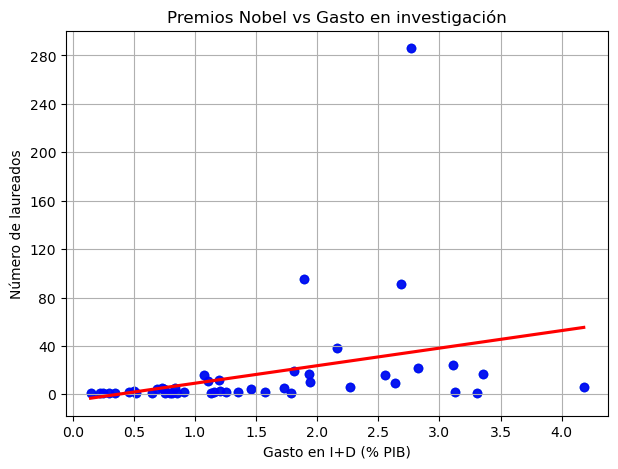

In [34]:
# Premios vs. investigación


x = dfC_ciencias['investigacion_pib']
y = dfC_ciencias['n_premios']

plt.figure(figsize=(7,5))
plt.scatter(x, y)

# Línea roja de tendencia
sns.regplot(data=dfC_ciencias, x='investigacion_pib', y='n_premios', ci=None, color='blue', line_kws={'color':'red'})

plt.xlabel("Gasto en I+D (% PIB)")
plt.ylabel("Número de laureados")
plt.title("Premios Nobel vs Gasto en investigación")
plt.grid(True)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


In [35]:
# Guardar el dataframe real dfC_ciencias en un CSV que Statgraphics pueda leer para un posible análisis con un modelo de regresión lineal

dfC_ciencias.to_csv("laureados_ciencias.csv", index=False, sep=",", encoding="utf-8")

print("Archivo 'laureados_ciencias.csv' guardado. Puedes abrirlo en Statgraphics.")



Archivo 'laureados_ciencias.csv' guardado. Puedes abrirlo en Statgraphics.
